In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# Remember the process

    Seperate your data into X and y
    
    Encode your data
    
    Split your data
    
    Scale your data
    
    Model your data

In [227]:
gpu = pd.read_csv('gpu.csv')

In [228]:
gpu.describe()

,releaseYear,memSize,memBusWidth,gpuClock,memClock,tmu,rop,G3Dmark,G2Dmark,testDate
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,2011.944020,3.078112,242.198473,783.315522,981.801527,57.486005,22.952926,3207.436387,381.519084,2013.452926
std,4.675391,4.748925,454.525419,341.528822,431.322303,65.490451,23.245115,5000.391155,261.783492,3.693816
min,2000.000000,0.032000,32.000000,143.000000,166.000000,2.000000,1.000000,1.000000,21.000000,2009.000000
25%,2008.000000,0.512000,128.000000,550.000000,750.000000,16.000000,8.000000,264.500000,166.250000,2010.000000
50%,2012.000000,2.000000,128.000000,725.000000,900.000000,32.000000,16.000000,1007.000000,319.000000,2013.000000
75%,2015.000000,4.000000,256.000000,970.000000,1250.000000,80.000000,32.000000,3556.750000,555.000000,2016.000000
max,2022.000000,48.000000,4096.000000,2321.000000,2248.000000,336.000000,128.000000,29094.000000,1117.000000,2022.000000


In [229]:
X = gpu.drop(columns = ['G3Dmark'])

In [230]:
X.head()

,manufacturer,GPU,releaseYear,memSize,memBusWidth,gpuClock,memClock,tmu,rop,igp,bus,memType,gpuChip,G2Dmark,testDate,category
0,NVIDIA,GeForce MX550,2022,2.0,64.0,1065,1500.0,32,16,No,PCIe 4.0 x8,GDDR6,TU117,424,2022,Unknown
1,NVIDIA,GeForce RTX 3090 Ti,2022,24.0,384.0,1560,1313.0,336,112,No,PCIe 4.0 x16,GDDR6X,GA102,1117,2022,Unknown
2,AMD,Radeon RX 6400,2022,4.0,64.0,1923,2000.0,48,32,No,PCIe 4.0 x4,GDDR6,Navi 24,899,2022,Unknown
3,AMD,Radeon RX 6500 XT,2022,4.0,64.0,2310,2248.0,64,32,No,PCIe 4.0 x4,GDDR6,Navi 24,910,2022,Unknown
4,AMD,Radeon RX 6700S,2022,8.0,128.0,1700,1750.0,112,64,No,PCIe 4.0 x8,GDDR6,Navi 23,829,2022,Unknown


In [231]:
y = gpu.G3Dmark

In [232]:
y.head(), y.shape

(0     5090
 1    29094
 2     6958
 3     9445
 4    11989
 Name: G3Dmark, dtype: int64,
 (786,))

In [233]:
X.dtypes

manufacturer     object
GPU              object
releaseYear       int64
memSize         float64
memBusWidth     float64
gpuClock          int64
memClock        float64
tmu               int64
rop               int64
igp              object
bus              object
memType          object
gpuChip          object
G2Dmark           int64
testDate          int64
category         object
dtype: object

So I've split my data into X and y. Y is of course my predictor variable, the 3DMark scores for every card, and X is all my other columns. Since 7 of my columns in X are categorical, I need to create dummies by one hot encoding them so they can be used in my model. Rememebr, I'll be creating a random forrest moodel here. Since I'll be using a random forest model, I dont neccesarily need to scale my data. (Hey Steve, I know the rubric says we need to scale the data, bit I'll try first with no scaling since we're using a tree based model)

I know were getting a bit ahead, but my process will be...

Create Dummies
Split my data
Create a model instance
Go from there.

Let's creat the dummies. 

In [234]:
X = pd.get_dummies(X)

In [235]:
X.head()

,releaseYear,memSize,memBusWidth,gpuClock,memClock,tmu,rop,G2Dmark,testDate,manufacturer_AMD,...,gpuChip_Vega 20,gpuChip_Venus,gpuChip_Vesuvius,gpuChip_Whistler,gpuChip_Wimbledon,category_Desktop,category_Mobile,"category_Mobile, Workstation",category_Unknown,category_Workstation
0,2022,2.0,64.0,1065,1500.0,32,16,424,2022,False,...,False,False,False,False,False,False,False,False,True,False
1,2022,24.0,384.0,1560,1313.0,336,112,1117,2022,False,...,False,False,False,False,False,False,False,False,True,False
2,2022,4.0,64.0,1923,2000.0,48,32,899,2022,True,...,False,False,False,False,False,False,False,False,True,False
3,2022,4.0,64.0,2310,2248.0,64,32,910,2022,True,...,False,False,False,False,False,False,False,False,True,False
4,2022,8.0,128.0,1700,1750.0,112,64,829,2022,True,...,False,False,False,False,False,False,False,False,True,False


In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [237]:
X_train.shape, X_test.shape

((589, 985), (197, 985))

In [238]:
y_train.shape, y_test.shape

((589,), (197,))

In [239]:
X_train.dtypes

releaseYear                       int64
memSize                         float64
memBusWidth                     float64
gpuClock                          int64
memClock                        float64
                                 ...   
category_Desktop                   bool
category_Mobile                    bool
category_Mobile, Workstation       bool
category_Unknown                   bool
category_Workstation               bool
Length: 985, dtype: object

Will the one hot features here being bools create issues? 

First, we'll look at modeling without scaling my data since the goal is a random forest model. 

I'll create my model, train it, evaluate some results, and tune from there. 

In [240]:
RF = RandomForestRegressor()

In [241]:
RF.fit(X_train, y_train)

RandomForestRegressor()

In [242]:
y_pred = RF.predict(X_test)

In [243]:
from sklearn import metrics

In [244]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 439.3630456852792
Mean Squared Error (MSE): 592537.1266903554
Root Mean Squared Error (RMSE): 769.7643319161751
Mean Absolute Percentage Error (MAPE): 0.2925889586341708
Explained Variance Score: 0.9755200526931179
Max Error: 4249.18
Mean Squared Log Error: 0.10516393777681676
Median Absolute Error: 167.3499999999999
R^2: 0.9754105906187731
Mean Poisson Deviance: 116.76611559120695
Mean Absolute Percentage Error (MAPE): 0.2925889586341708
Accuracy: 70.74


I'm immediately sekptical about R squared, from what I understand if your data set has a ton of features that will naturally drive up the R squared value, I should probably look at adjusted R squared.

Since our metric in question is the benchmark score, a max error of 4415 certainly isn't great, but it's not terrible either on the scale of benchmark scores. 

Now, I'm going to tune with Random Search CV to see if we can improve on this. First I'll call help on the RF regressor to check the parameters and their default values. 

In [51]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sphx_glr_auto_examp

I'll start by defining the values for my random grid. 

In [76]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['sqrt','log2', 1.0]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 4, 6, 8]
bootstrap = [True, False]

Then, I'll define the random grid itself and create the CV object. We'll use 3 fold CV. 

In [77]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

RFRandom = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,n_iter = 100,cv = 3, random_state = 100)


RFRandom.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['sqrt', 'log2', 1.0],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=100)

In [78]:
print(RFRandom.best_params_)

{'n_estimators': 733, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}


In [79]:
y_pred3 = RFRandom.predict(X_test)

In [80]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred3, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred2))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred3))
print('Max Error:', metrics.max_error(y_test, y_pred3))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred3))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred3))
print('R^2:', metrics.r2_score(y_test, y_pred3))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred3))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred3))
mape = np.mean(np.abs((y_test - y_pred3) / np.abs(y_test)))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 465.10349189640885
Mean Squared Error (MSE): 734646.4711978055
Root Mean Squared Error (RMSE): 857.1152029907097
Mean Absolute Percentage Error (MAPE): 0.45540115098643436
Explained Variance Score: 0.969661077250413
Max Error: 5614.695770804912
Mean Squared Log Error: 0.18157628337935955
Median Absolute Error: 204.2482946793998
R^2: 0.9695132642039549
Mean Poisson Deviance: 131.24008787389644
Mean Absolute Percentage Error (MAPE): 0.4302929587098635
Accuracy: 56.97


This is not what I expected at all. Why did it decrease so much? Looking back, the default values are all included in the random grid, so it does not make sense to my why it could see such a decrease in performance. 

(Future Brody here, I was really only looking at accuracy when I did this, but I'm not sure how accuracy could be applied to regression since we're not predicting a yes or no outcome. Still, the MAE, MSE, and RMSE all increased.)

We can try and find the issue later. For now, I am going to scale my data then run it through the out of the box random forest regressor. I'll do this through a pipeline. 

In [245]:
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor())

In [246]:
type(pipeline)

sklearn.pipeline.Pipeline

In [247]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [248]:
y_train_predicted = pipeline.predict(X_train)
y_test_predicted = pipeline.predict(X_test)

In [249]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_test_predicted))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_predicted))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_test_predicted, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_test_predicted))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_test_predicted))
print('Max Error:', metrics.max_error(y_test, y_test_predicted))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_test_predicted))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_test_predicted))
print('R^2:', metrics.r2_score(y_test,y_test_predicted))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_test_predicted))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_test_predicted))
mape = np.mean(np.abs((y_test - y_test_predicted) / np.abs(y_test)))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 430.4826903553299
Mean Squared Error (MSE): 591779.2748035531
Root Mean Squared Error (RMSE): 769.2719121374139
Mean Absolute Percentage Error (MAPE): 0.29146256663444575
Explained Variance Score: 0.9754837932190452
Max Error: 4818.889999999999
Mean Squared Log Error: 0.1041694903941283
Median Absolute Error: 168.83999999999992
R^2: 0.9754420403447995
Mean Poisson Deviance: 117.47013900959183
Mean Absolute Percentage Error (MAPE): 0.29146256663444575
Accuracy: 70.85


So it seems like scaling my data did actually improve things a bit. My Max Error, MAE, MSE, and MAPE decrease slighlty. I'm fairly certain R squared isn't telling me much of anything with this many feautres. We have over 1000 after encoding. 

So there are almost 1000 features after encoding. I want to try running things through a model using only my numerical features and not encoding anything.

In [253]:
y2 = gpu.G3Dmark
X2 = gpu.drop(columns = ['G3Dmark', 'manufacturer','igp','bus','memType','gpuChip','category'])

In [254]:
X2.head()

,GPU,releaseYear,memSize,memBusWidth,gpuClock,memClock,tmu,rop,G2Dmark,testDate
0,GeForce MX550,2022,2.0,64.0,1065,1500.0,32,16,424,2022
1,GeForce RTX 3090 Ti,2022,24.0,384.0,1560,1313.0,336,112,1117,2022
2,Radeon RX 6400,2022,4.0,64.0,1923,2000.0,48,32,899,2022
3,Radeon RX 6500 XT,2022,4.0,64.0,2310,2248.0,64,32,910,2022
4,Radeon RX 6700S,2022,8.0,128.0,1700,1750.0,112,64,829,2022


In [255]:
X2 = X2.set_index('GPU')

In [256]:
X2.head()

,releaseYear,memSize,memBusWidth,gpuClock,memClock,tmu,rop,G2Dmark,testDate
GPU,,,,,,,,,
GeForce MX550,2022,2.0,64.0,1065,1500.0,32,16,424,2022
GeForce RTX 3090 Ti,2022,24.0,384.0,1560,1313.0,336,112,1117,2022
Radeon RX 6400,2022,4.0,64.0,1923,2000.0,48,32,899,2022
Radeon RX 6500 XT,2022,4.0,64.0,2310,2248.0,64,32,910,2022
Radeon RX 6700S,2022,8.0,128.0,1700,1750.0,112,64,829,2022


So I dropped every column containing categorical data and set the GPU's themselves to the index. Now I will split and run it through the basic RF model. 

In [257]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = .25, random_state = 100)

In [258]:
RF4 = RandomForestRegressor()

In [259]:
RF4.fit(X_train2, y_train2)

RandomForestRegressor()

In [260]:
y_pred4 = RF4.predict(X_test2)

In [261]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test2, y_pred4))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test2, y_pred4))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test2, y_pred4, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test2, y_pred4))
print('Explained Variance Score:', metrics.explained_variance_score(y_test2, y_pred4))
print('Max Error:', metrics.max_error(y_test2, y_pred4))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test2, y_pred4))
print('Median Absolute Error:', metrics.median_absolute_error(y_test2, y_pred4))
print('R^2:', metrics.r2_score(y_test2, y_pred4))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test2, y_pred4))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test2, y_pred4))
mape = np.mean(np.abs((y_test2 - y_pred4) / np.abs(y_test2)))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 451.98395939086294
Mean Squared Error (MSE): 635637.9215076141
Root Mean Squared Error (RMSE): 797.2690396018236
Mean Absolute Percentage Error (MAPE): 0.2713411225505173
Explained Variance Score: 0.9736794623807321
Max Error: 4525.139999999999
Mean Squared Log Error: 0.09627494160894372
Median Absolute Error: 173.43000000000006
R^2: 0.9736219717446486
Mean Poisson Deviance: 122.27123341719772
Mean Absolute Percentage Error (MAPE): 0.2713411225505173
Accuracy: 72.87


So it seems like things have only gotten marginally worse from the inital model. Let's scale everything and try again.

In [262]:
pipeline2 = make_pipeline(StandardScaler(), RandomForestRegressor())

In [263]:
pipeline2.fit(X_train2,y_train2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [264]:
y_pred5 = pipeline2.predict(X_test2)

In [265]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test2, y_pred5))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test2, y_pred5))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test2, y_pred5, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test2, y_pred5))
print('Explained Variance Score:', metrics.explained_variance_score(y_test2, y_pred5))
print('Max Error:', metrics.max_error(y_test2, y_pred5))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test2, y_pred5))
print('Median Absolute Error:', metrics.median_absolute_error(y_test2, y_pred5))
print('R^2:', metrics.r2_score(y_test2, y_pred5))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test2, y_pred5))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test2, y_pred5))
mape = np.mean(np.abs((y_test2 - y_pred5) / np.abs(y_test2)))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 427.99807106598985
Mean Squared Error (MSE): 544044.0675807106
Root Mean Squared Error (RMSE): 737.5934297298958
Mean Absolute Percentage Error (MAPE): 0.2804308803802576
Explained Variance Score: 0.977471185343172
Max Error: 3696.8599999999997
Mean Squared Log Error: 0.1008255449092984
Median Absolute Error: 149.96000000000004
R^2: 0.9774229804402437
Mean Poisson Deviance: 112.06437260992176
Mean Absolute Percentage Error (MAPE): 0.2804308803802576
Accuracy: 71.96


Well, there's the best model so far it seems judging primarily from the Max Error and MAE. Let's visualize the important features below. 

Text(0.5, 1.0, 'Visualizing Feature Importances')

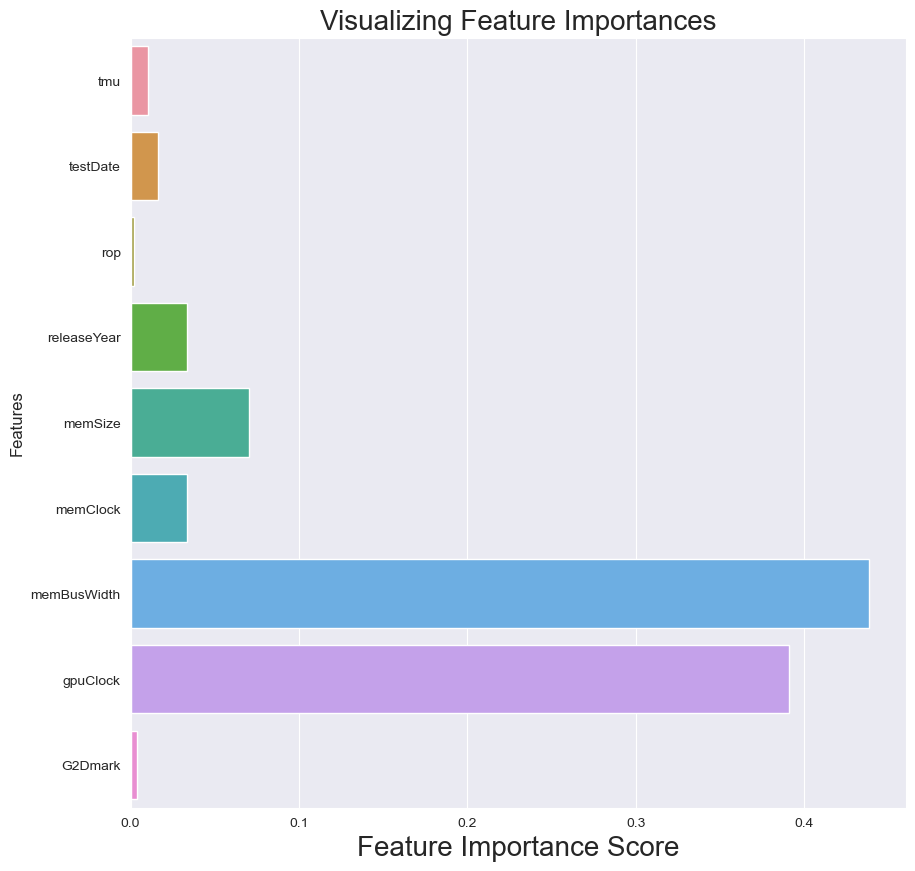

In [266]:
feature_imp = pd.Series(RF4.feature_importances_, 
                        index=X2.columns.sort_values(ascending=False))

sns.set_style('darkgrid')
plt.figure(figsize = (10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Feature Importances", fontsize=20)

So simply removing the categorical feautres and scaling the data seemed to imporve things a bit. Im not sure what to make of the feature importance graph above. 

Let's try encoding things different way, a way that doesnt result in almost 1000 features. I'll try count encoding, since it doesn't result in a bigger feature space after encoding. 

In [146]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.8 MB/s eta 0:00:00


In [267]:
from category_encoders.count import CountEncoder

In [268]:
count_encoder = CountEncoder()

In [269]:
X3 = gpu.drop(columns = ['G3Dmark'])

In [270]:
X3.head()

,manufacturer,GPU,releaseYear,memSize,memBusWidth,gpuClock,memClock,tmu,rop,igp,bus,memType,gpuChip,G2Dmark,testDate,category
0,NVIDIA,GeForce MX550,2022,2.0,64.0,1065,1500.0,32,16,No,PCIe 4.0 x8,GDDR6,TU117,424,2022,Unknown
1,NVIDIA,GeForce RTX 3090 Ti,2022,24.0,384.0,1560,1313.0,336,112,No,PCIe 4.0 x16,GDDR6X,GA102,1117,2022,Unknown
2,AMD,Radeon RX 6400,2022,4.0,64.0,1923,2000.0,48,32,No,PCIe 4.0 x4,GDDR6,Navi 24,899,2022,Unknown
3,AMD,Radeon RX 6500 XT,2022,4.0,64.0,2310,2248.0,64,32,No,PCIe 4.0 x4,GDDR6,Navi 24,910,2022,Unknown
4,AMD,Radeon RX 6700S,2022,8.0,128.0,1700,1750.0,112,64,No,PCIe 4.0 x8,GDDR6,Navi 23,829,2022,Unknown


In [271]:
X3[['manufacturer_enc','GPU_enc','igp_enc','bus_enc','memType_enc','gpuChip_enc','category_enc']] = count_encoder.fit_transform(X3[['manufacturer','GPU','igp','bus','memType','gpuChip','category']])

In [272]:
X3 = X3.drop(columns = ['manufacturer','GPU','igp','bus','memType','gpuChip','category'])

In [278]:
X3.head()

,releaseYear,memSize,memBusWidth,gpuClock,memClock,tmu,rop,G2Dmark,testDate,manufacturer_enc,GPU_enc,igp_enc,bus_enc,memType_enc,gpuChip_enc,category_enc
0,2022,2.0,64.0,1065,1500.0,32,16,424,2022,536,1,786,15,58,5,192
1,2022,24.0,384.0,1560,1313.0,336,112,1117,2022,536,1,786,29,5,7,192
2,2022,4.0,64.0,1923,2000.0,48,32,899,2022,250,1,786,2,58,2,192
3,2022,4.0,64.0,2310,2248.0,64,32,910,2022,250,1,786,2,58,2,192
4,2022,8.0,128.0,1700,1750.0,112,64,829,2022,250,1,786,15,58,4,192


So, I created my count encoder object, encoded my categorical variables using the fit_transform method of the object, and dropped my original columns, so only the encoded columns were left. They're now marked with the suffix _enc.

In [273]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y2, test_size = .25, random_state = 100)

In [274]:
RF5 = RandomForestRegressor()

In [275]:
RF5.fit(X_train4, y_train4)

RandomForestRegressor()

In [276]:
y_pred6 = RF5.predict(X_test4)

In [279]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test4, y_pred6))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test4, y_pred6))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test4, y_pred6, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test4, y_pred6))
print('Explained Variance Score:', metrics.explained_variance_score(y_test4, y_pred6))
print('Max Error:', metrics.max_error(y_test4, y_pred6))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test4, y_pred6))
print('Median Absolute Error:', metrics.median_absolute_error(y_test4, y_pred6))
print('R^2:', metrics.r2_score(y_test4, y_pred6))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test4, y_pred6))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test4, y_pred6))
mape = np.mean(np.abs((y_test4 - y_pred6) / np.abs(y_test4)))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 439.5743654822335
Mean Squared Error (MSE): 582341.6351304569
Root Mean Squared Error (RMSE): 763.1131207956373
Mean Absolute Percentage Error (MAPE): 0.26362960220779796
Explained Variance Score: 0.9758884104510445
Max Error: 4354.67
Mean Squared Log Error: 0.09399472666997946
Median Absolute Error: 166.27999999999997
R^2: 0.9758336883531032
Mean Poisson Deviance: 114.77774726322696
Mean Absolute Percentage Error (MAPE): 0.26362960220779796
Accuracy: 73.64


Hmm, pretty much the same as all my other models. I'll run this newly encoded data through the pipeline to scale it and model again. 

In [280]:
pipeline2.fit(X_train4, y_train4)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [283]:
y_pred7 = pipeline2.predict(X_test4)

In [291]:
import statsmodels.api as sm

In [295]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test4, y_pred7))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test4, y_pred7))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test4, y_pred7, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test4, y_pred7))
print('Explained Variance Score:', metrics.explained_variance_score(y_test4, y_pred7))
print('Max Error:', metrics.max_error(y_test4, y_pred7))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test4, y_pred7))
print('Median Absolute Error:', metrics.median_absolute_error(y_test4, y_pred7))
print('R^2:', metrics.r2_score(y_test4, y_pred7))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test4, y_pred7))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test4, y_pred7))
mape = np.mean(np.abs((y_test4 - y_pred7) / np.abs(y_test4)))
print('Accuracy:', round(100*(1 - mape), 2))
print('Adjusted R2:', 1 - (1-metrics.r2_score(y_test4, y_pred7)) * (len(y_test4)-1)/(len(y_test4)-X3.shape[1]-1))

Mean Absolute Error (MAE): 445.0618781725888
Mean Squared Error (MSE): 604969.7396756345
Root Mean Squared Error (RMSE): 777.7980069887262
Mean Absolute Percentage Error (MAPE): 0.26839284446760403
Explained Variance Score: 0.9749415430708872
Max Error: 4303.27
Mean Squared Log Error: 0.09830514951102771
Median Absolute Error: 175.10999999999967
R^2: 0.9748946556729225
Mean Poisson Deviance: 119.79349946782921
Mean Absolute Percentage Error (MAPE): 0.26839284446760403
Accuracy: 73.16
Adjusted R2: 0.9726630695105156


And now I'll visualize the feature importance again. 

Text(0.5, 1.0, 'Visualizing Feature Importances')

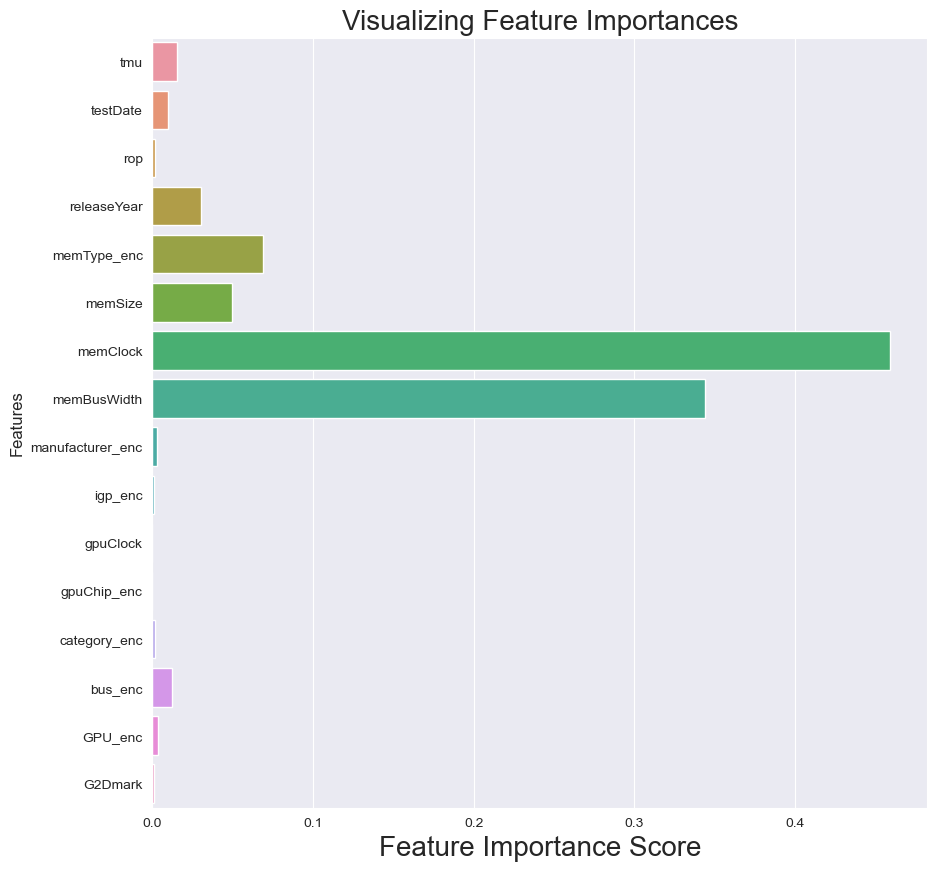

In [287]:
feature_imp2 = pd.Series(RF5.feature_importances_, 
                        index=X3.columns.sort_values(ascending=False))

sns.set_style('darkgrid')
plt.figure(figsize = (10,10))
sns.barplot(x=feature_imp2, y=feature_imp2.index)
plt.xlabel('Feature Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Feature Importances", fontsize=20)

I've now encoded two different ways, tried tunning with random search (which didn't result in any improvements), tried removing my categorical variables all together, and for each of those scanrios, I've modeled using data that was scaled and not scaled. 

My mind keeps coming back to the fact that there as so many different ways of encoding, scaling, modeling, that I could spend months trying different combos, I suppose in the real world I may do just that! 

For the sake of a first project, I'll leave this here. I'm going to try a gradient boost model now and see what happens, then I'll turn this in for feedback. 

In [319]:
GB = GradientBoostingRegressor()

In [320]:
X3.head()

,releaseYear,memSize,memBusWidth,gpuClock,memClock,tmu,rop,G2Dmark,testDate,manufacturer_enc,GPU_enc,igp_enc,bus_enc,memType_enc,gpuChip_enc,category_enc
0,2022,2.0,64.0,1065,1500.0,32,16,424,2022,536,1,786,15,58,5,192
1,2022,24.0,384.0,1560,1313.0,336,112,1117,2022,536,1,786,29,5,7,192
2,2022,4.0,64.0,1923,2000.0,48,32,899,2022,250,1,786,2,58,2,192
3,2022,4.0,64.0,2310,2248.0,64,32,910,2022,250,1,786,2,58,2,192
4,2022,8.0,128.0,1700,1750.0,112,64,829,2022,250,1,786,15,58,4,192


In [321]:
y2.head()

0     5090
1    29094
2     6958
3     9445
4    11989
Name: G3Dmark, dtype: int64

I'm going to use my count encoded data as my X, and (of course) the G3Dmark scores as my y. 

In [322]:
X_trainGB, X_testGB, y_trainGB, y_testGB = train_test_split(X3, y2, test_size = 0.25, random_state = 100)

In [323]:
GB.fit(X_trainGB, y_trainGB)

GradientBoostingRegressor()

In [324]:
y_predGB = GB.predict(X_testGB)

In [325]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_testGB, y_predGB))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_testGB, y_predGB))
print('Max Error:', metrics.max_error(y_testGB, y_predGB))

Mean Absolute Error (MAE): 450.8666055651933
Mean Squared Error (MSE): 582910.2927923461
Max Error: 3771.027062777008


I'm going to loop through different options for the learning rate and number of estimators hyper parameters using I function I found after some research on GB models. 

In [326]:
for i in [0.1, 0.01, 0.001]:
    for j in [100, 250, 500, 750]:
        gbt = GradientBoostingRegressor(learning_rate=i, n_estimators=j)
        gbt = gbt.fit(X_trainGB, y_trainGB)
        print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
        mse = mean_squared_error(y_testGB, gbt.predict(X_testGB))
        print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

        pred2 = gbt.predict(X_testGB)
        print("Accuracy on training set: %.3f" % gbt.score(X_trainGB, y_trainGB))
        print("Accuracy on test set: %.3f" % gbt.score(X_testGB, y_testGB))
        print("==============================================")

predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=100
The mean squared error (MSE) on test set: 590626.9663
Accuracy on training set: 0.994
Accuracy on test set: 0.975
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=250
The mean squared error (MSE) on test set: 531097.8792
Accuracy on training set: 0.998
Accuracy on test set: 0.978
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=500
The mean squared error (MSE) on test set: 534165.2553
Accuracy on training set: 1.000
Accuracy on test set: 0.978
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=750
The mean squared error (MSE) on test set: 534812.4011
Accuracy on training set: 1.000
Accuracy on test set: 0.978
predict output for GradientBoostingRegressor: learning_rate=0.01, n_estimators=100
The mean squared error (MSE) on test set: 4441455.2692
Accuracy on training set: 0.823
Accuracy on test set: 0.816
predict output for

Now I'll learn and test on the params that gave the best results. 

In [327]:
gbt = GradientBoostingRegressor(learning_rate=0.1, n_estimators=250)

gbt = gbt.fit(X_trainGB, y_trainGB)
print("Predict output for this Gradient Boosting Regressor: learning_rate={}, n_estimators={}".format(i, j))
mse = mean_squared_error(y_testGB, gbt.predict(X_testGB))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

pred2 = gbt.predict(X_testGB)
print("The best accuracy on training set: %.3f" % gbt.score(X_trainGB, y_trainGB))
print("The best accuracy on test set: %.3f" % gbt.score(X_testGB, y_testGB))

Predict output for this Gradient Boosting Regressor: learning_rate=0.001, n_estimators=750
The mean squared error (MSE) on test set: 496257.1275
The best accuracy on training set: 0.998
The best accuracy on test set: 0.979


Does this just mean I'm extremely overfit?

In [328]:
print(gbt.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Judging on test set accuracy and MSE, this gradient boost model, using count encoded data, that was not scaled, gave me the best overall results so far. 

Let's try this same thing but with data that was dummy encoded. 

In [329]:
X_trainGB2, X_testGB2, y_trainGB2, y_testGB2 = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [330]:
for i in [0.1, 0.01, 0.001]:
    for j in [100, 250, 500, 750]:
        gbt = GradientBoostingRegressor(learning_rate=i, n_estimators=j)
        gbt = gbt.fit(X_trainGB2, y_trainGB2)
        print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
        mse = mean_squared_error(y_testGB2, gbt.predict(X_testGB2))
        print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

        pred2 = gbt.predict(X_testGB2)
        print("Accuracy on training set: %.3f" % gbt.score(X_trainGB2, y_trainGB2))
        print("Accuracy on test set: %.3f" % gbt.score(X_testGB2, y_testGB2))
        print("==============================================")

predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=100
The mean squared error (MSE) on test set: 666392.7317
Accuracy on training set: 0.994
Accuracy on test set: 0.972
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=250
The mean squared error (MSE) on test set: 612054.2608
Accuracy on training set: 0.998
Accuracy on test set: 0.975
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=500
The mean squared error (MSE) on test set: 603770.1867
Accuracy on training set: 0.999
Accuracy on test set: 0.975
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=750
The mean squared error (MSE) on test set: 584501.2905
Accuracy on training set: 0.999
Accuracy on test set: 0.976
predict output for GradientBoostingRegressor: learning_rate=0.01, n_estimators=100
The mean squared error (MSE) on test set: 4480984.7301
Accuracy on training set: 0.823
Accuracy on test set: 0.814
predict output for

So a very small decrease in test score on the best performing model, but it's so small it may just be margin or error. Seems like count encoding and dummy encoding provide very similar results. The count encoded data was much faster to run, so I'd stick with that in the future. 

# Final Results

Top Two Models: 

Rank 1: My Gradient Boosted Model, using count encoded data, that was not scaled, slighly tuned on two parameters.

Rank 2: My basic Random Forest model using only my numerical features (that were scaled) and dropping all categorical features. 